In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sunny\Desktop\Projects\Walmart_Sales_py.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
pd.isnull(df).sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# No NULL values found

In [7]:
df.rename(columns={'Unemployment':'Unemp_Rate'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemp_Rate    6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.drop(['Holiday_Flag'], axis=1, inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [11]:
#Data Analysis

C:\Users\sunny\AppData\Local\Temp\ipykernel_23304\2499439610.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales, palette='Blues_d')


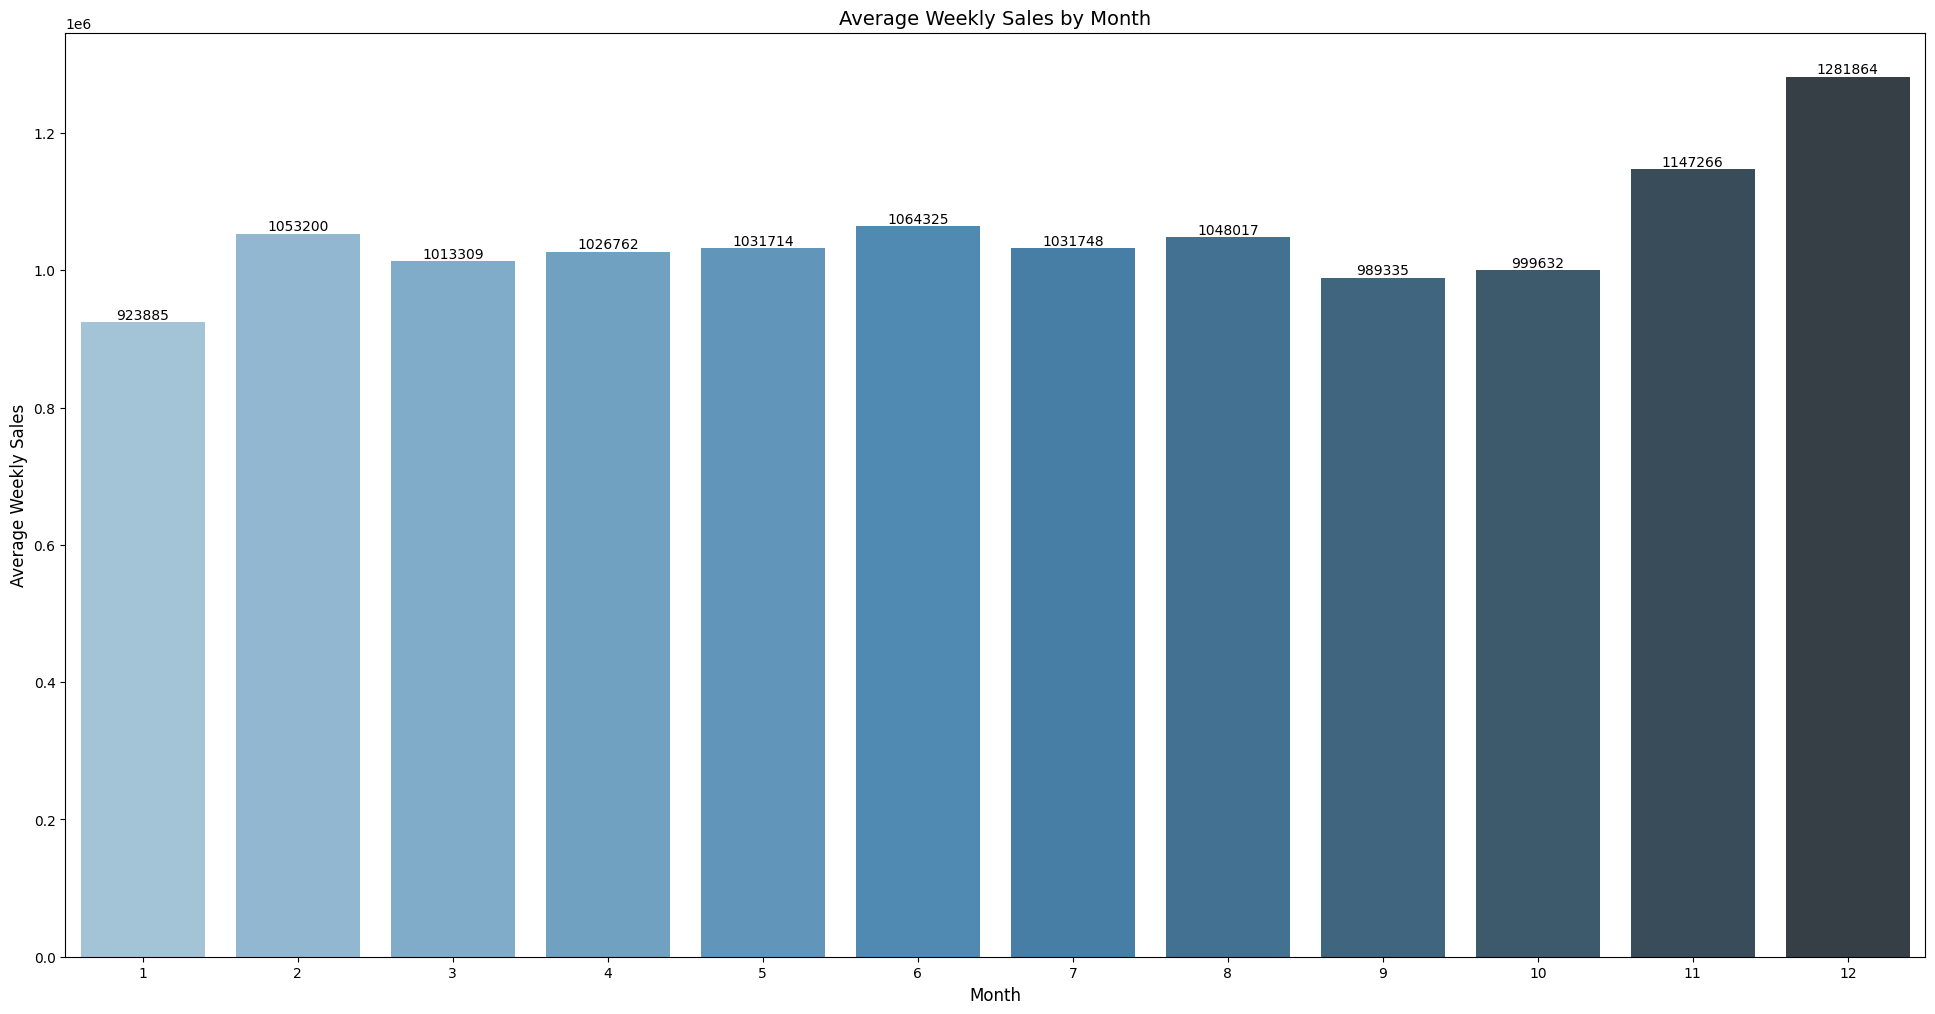

In [15]:
#Average Monthly Sale
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(24, 12))
ax = sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales, palette='Blues_d')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')

ax.set_title('Average Weekly Sales by Month', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Weekly Sales', fontsize=12)


plt.show()

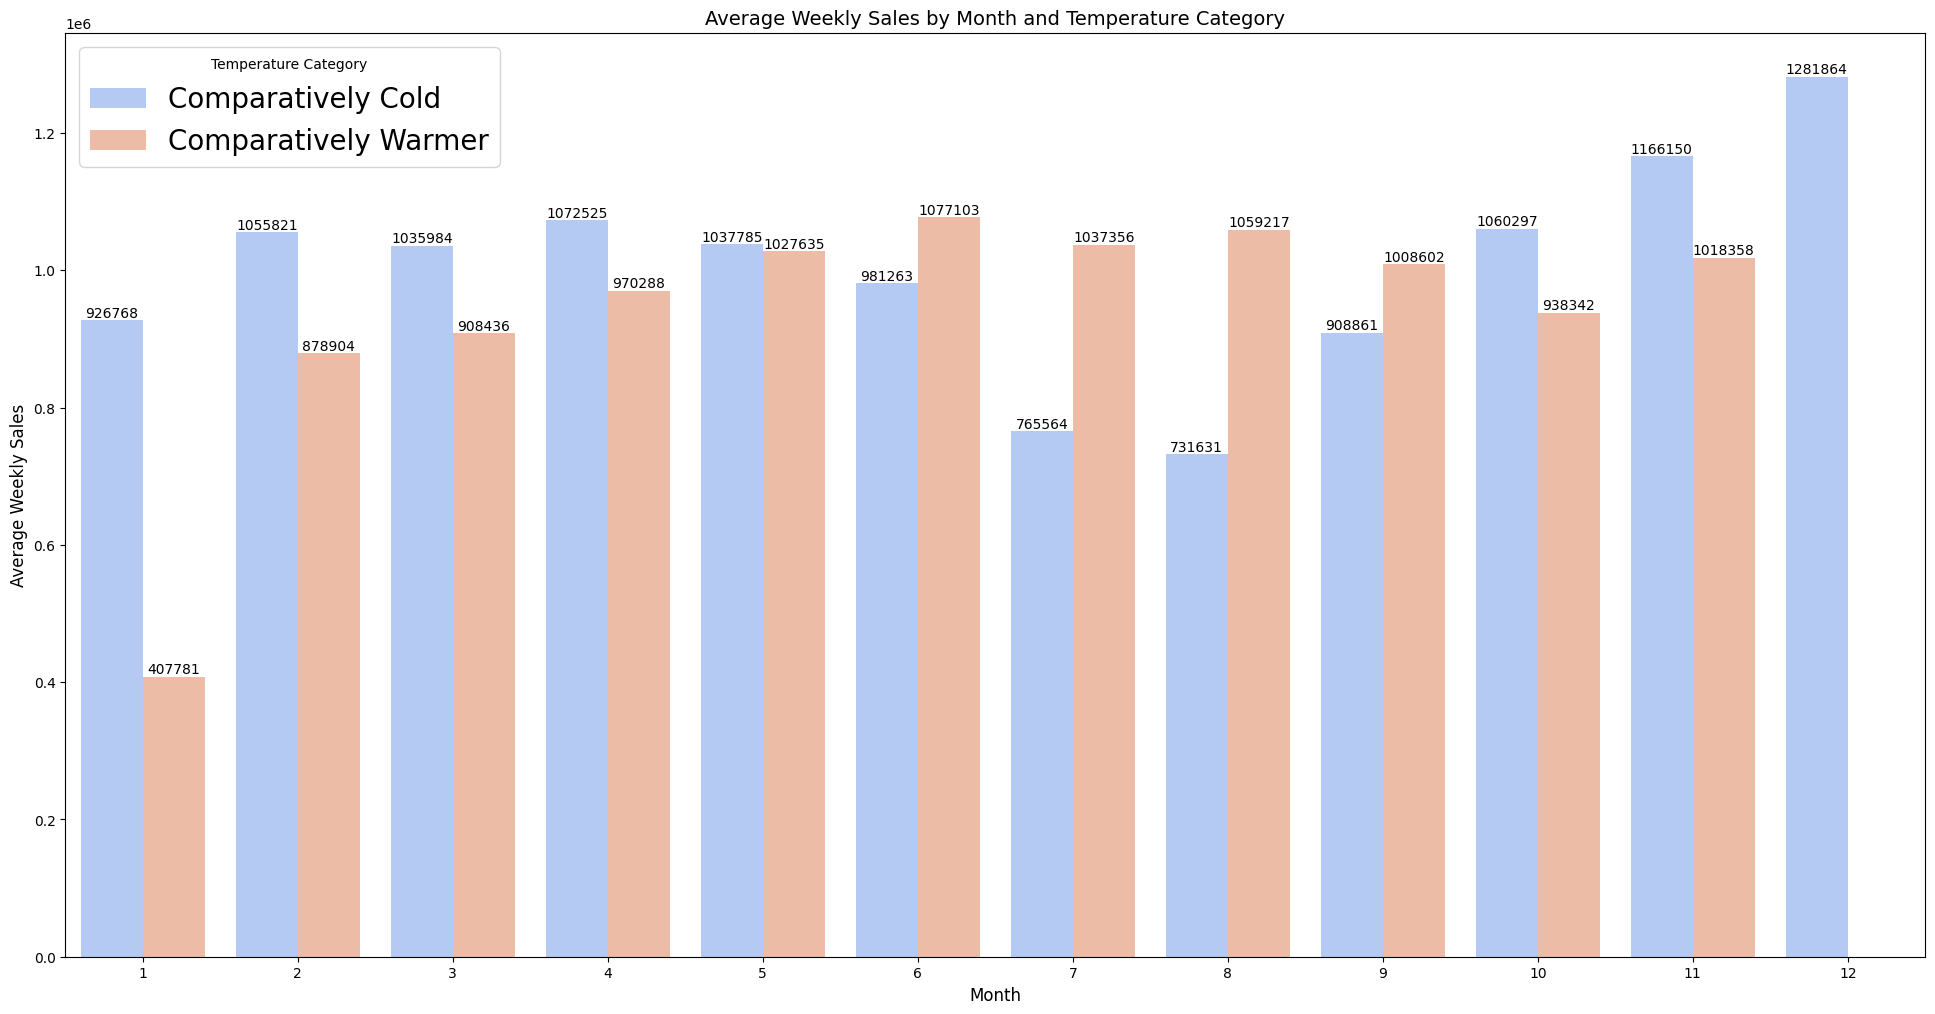

In [17]:
#Temperature and its Affect on Average Sales per Month

median_temp = df['Temperature'].median()
df['Temp_Category'] = df['Temperature'].apply(
    lambda x: 'Comparatively Warmer' if x > median_temp else 'Comparatively Cold'
)


temp_monthly_sales = df.groupby(['Month', 'Temp_Category'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(24, 12))
ax = sns.barplot(
    data=temp_monthly_sales, 
    x='Month', 
    y='Weekly_Sales', 
    hue='Temp_Category', 
    palette='coolwarm'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')

ax.set_title('Average Weekly Sales by Month and Temperature Category', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Weekly Sales', fontsize=12)
ax.legend(title='Temperature Category', fontsize=20, loc='upper left')

plt.show()



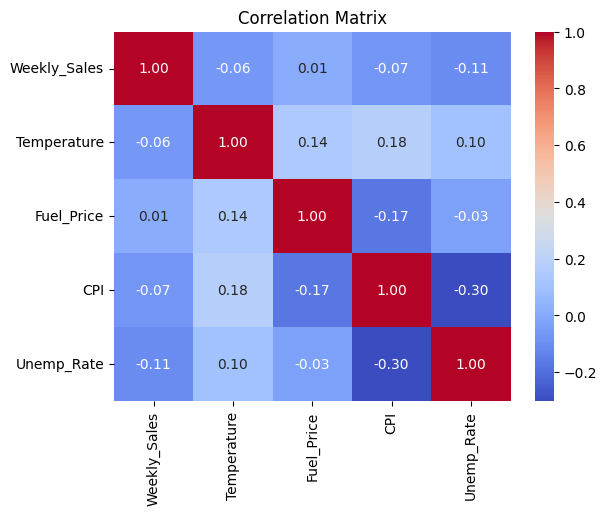

In [18]:
#Correlation Matrix

corr_mat = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemp_Rate']].corr()

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
